In [2]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pickle
import matplotlib.pyplot as plt
import numpy as np
import re
import copy

In [3]:
history = []
# inputs = [['v1_9/5_epoch', '512-512 fc layers'], 
#           ['v1_10/10_epoch', '512-1024-512 fc layers'], 
#           ['v1_11/10_epoch', '512-1024-2048-1024-512 fc layers']]

inputs = [['v1_14/40_epoch', '512-1024-512 fc layers'], 
          ['v1_15/30_epoch', '512-1024-2048-1024-512 fc layers'], 
          ['v1_16/40_epoch', '256-512-256 fc layers'],
          ['v1_17/40_epoch', '128-256-128 fc layers'],
          ['v1_18/60_epoch', '64-128-64 fc layers']]

for inp in inputs:
    el = {}
    el['name'] = inp[0]
    el['description'] = inp[1]
    pickle_input = open(el['name'] + '_history.pkl', 'rb')
    el['history'] = pickle.load(pickle_input)
    history.append(el)

In [24]:
history[0]
for el in history:
    print('-----------------------------------------')
    print(el['description'])
    ordered = sorted(el['history']['val_actual_accuracy'], reverse=True)
    print(ordered[:10])
    ordered_indices = [el['history']['val_actual_accuracy'].index(a) for a in ordered]
    print(ordered_indices[:10])
#     print(el['history']['val_actual_accuracy'].index(max(el['history']['val_actual_accuracy'])))
    print('-----------------------------------------')

-----------------------------------------
512-1024-512 fc layers
[0.87391819091234479, 0.87335835757748181, 0.87286276741219337, 0.87229375648167695, 0.87218362533383509, 0.87202760620772568, 0.87177063352942796, 0.87174310074246752, 0.8716421471902791, 0.87158708161635812]
[397, 566, 770, 638, 617, 440, 695, 678, 611, 401]
-----------------------------------------
-----------------------------------------
512-1024-2048-1024-512 fc layers
[0.8708436963684254, 0.8706876772423161, 0.87028386303356242, 0.87005442314222525, 0.87001771275961126, 0.86980662805958098, 0.86959554335955069, 0.86932021548994598, 0.86927432751167844, 0.86912748598122269]
[556, 549, 465, 583, 492, 313, 557, 401, 381, 551]
-----------------------------------------
-----------------------------------------
256-512-256 fc layers
[0.8791769532217949, 0.87699268545626419, 0.87667146960839204, 0.87652462807793619, 0.87650627288662919, 0.87644202971705476, 0.8763135433779059, 0.87599232753003364, 0.87586384119088478, 0.8

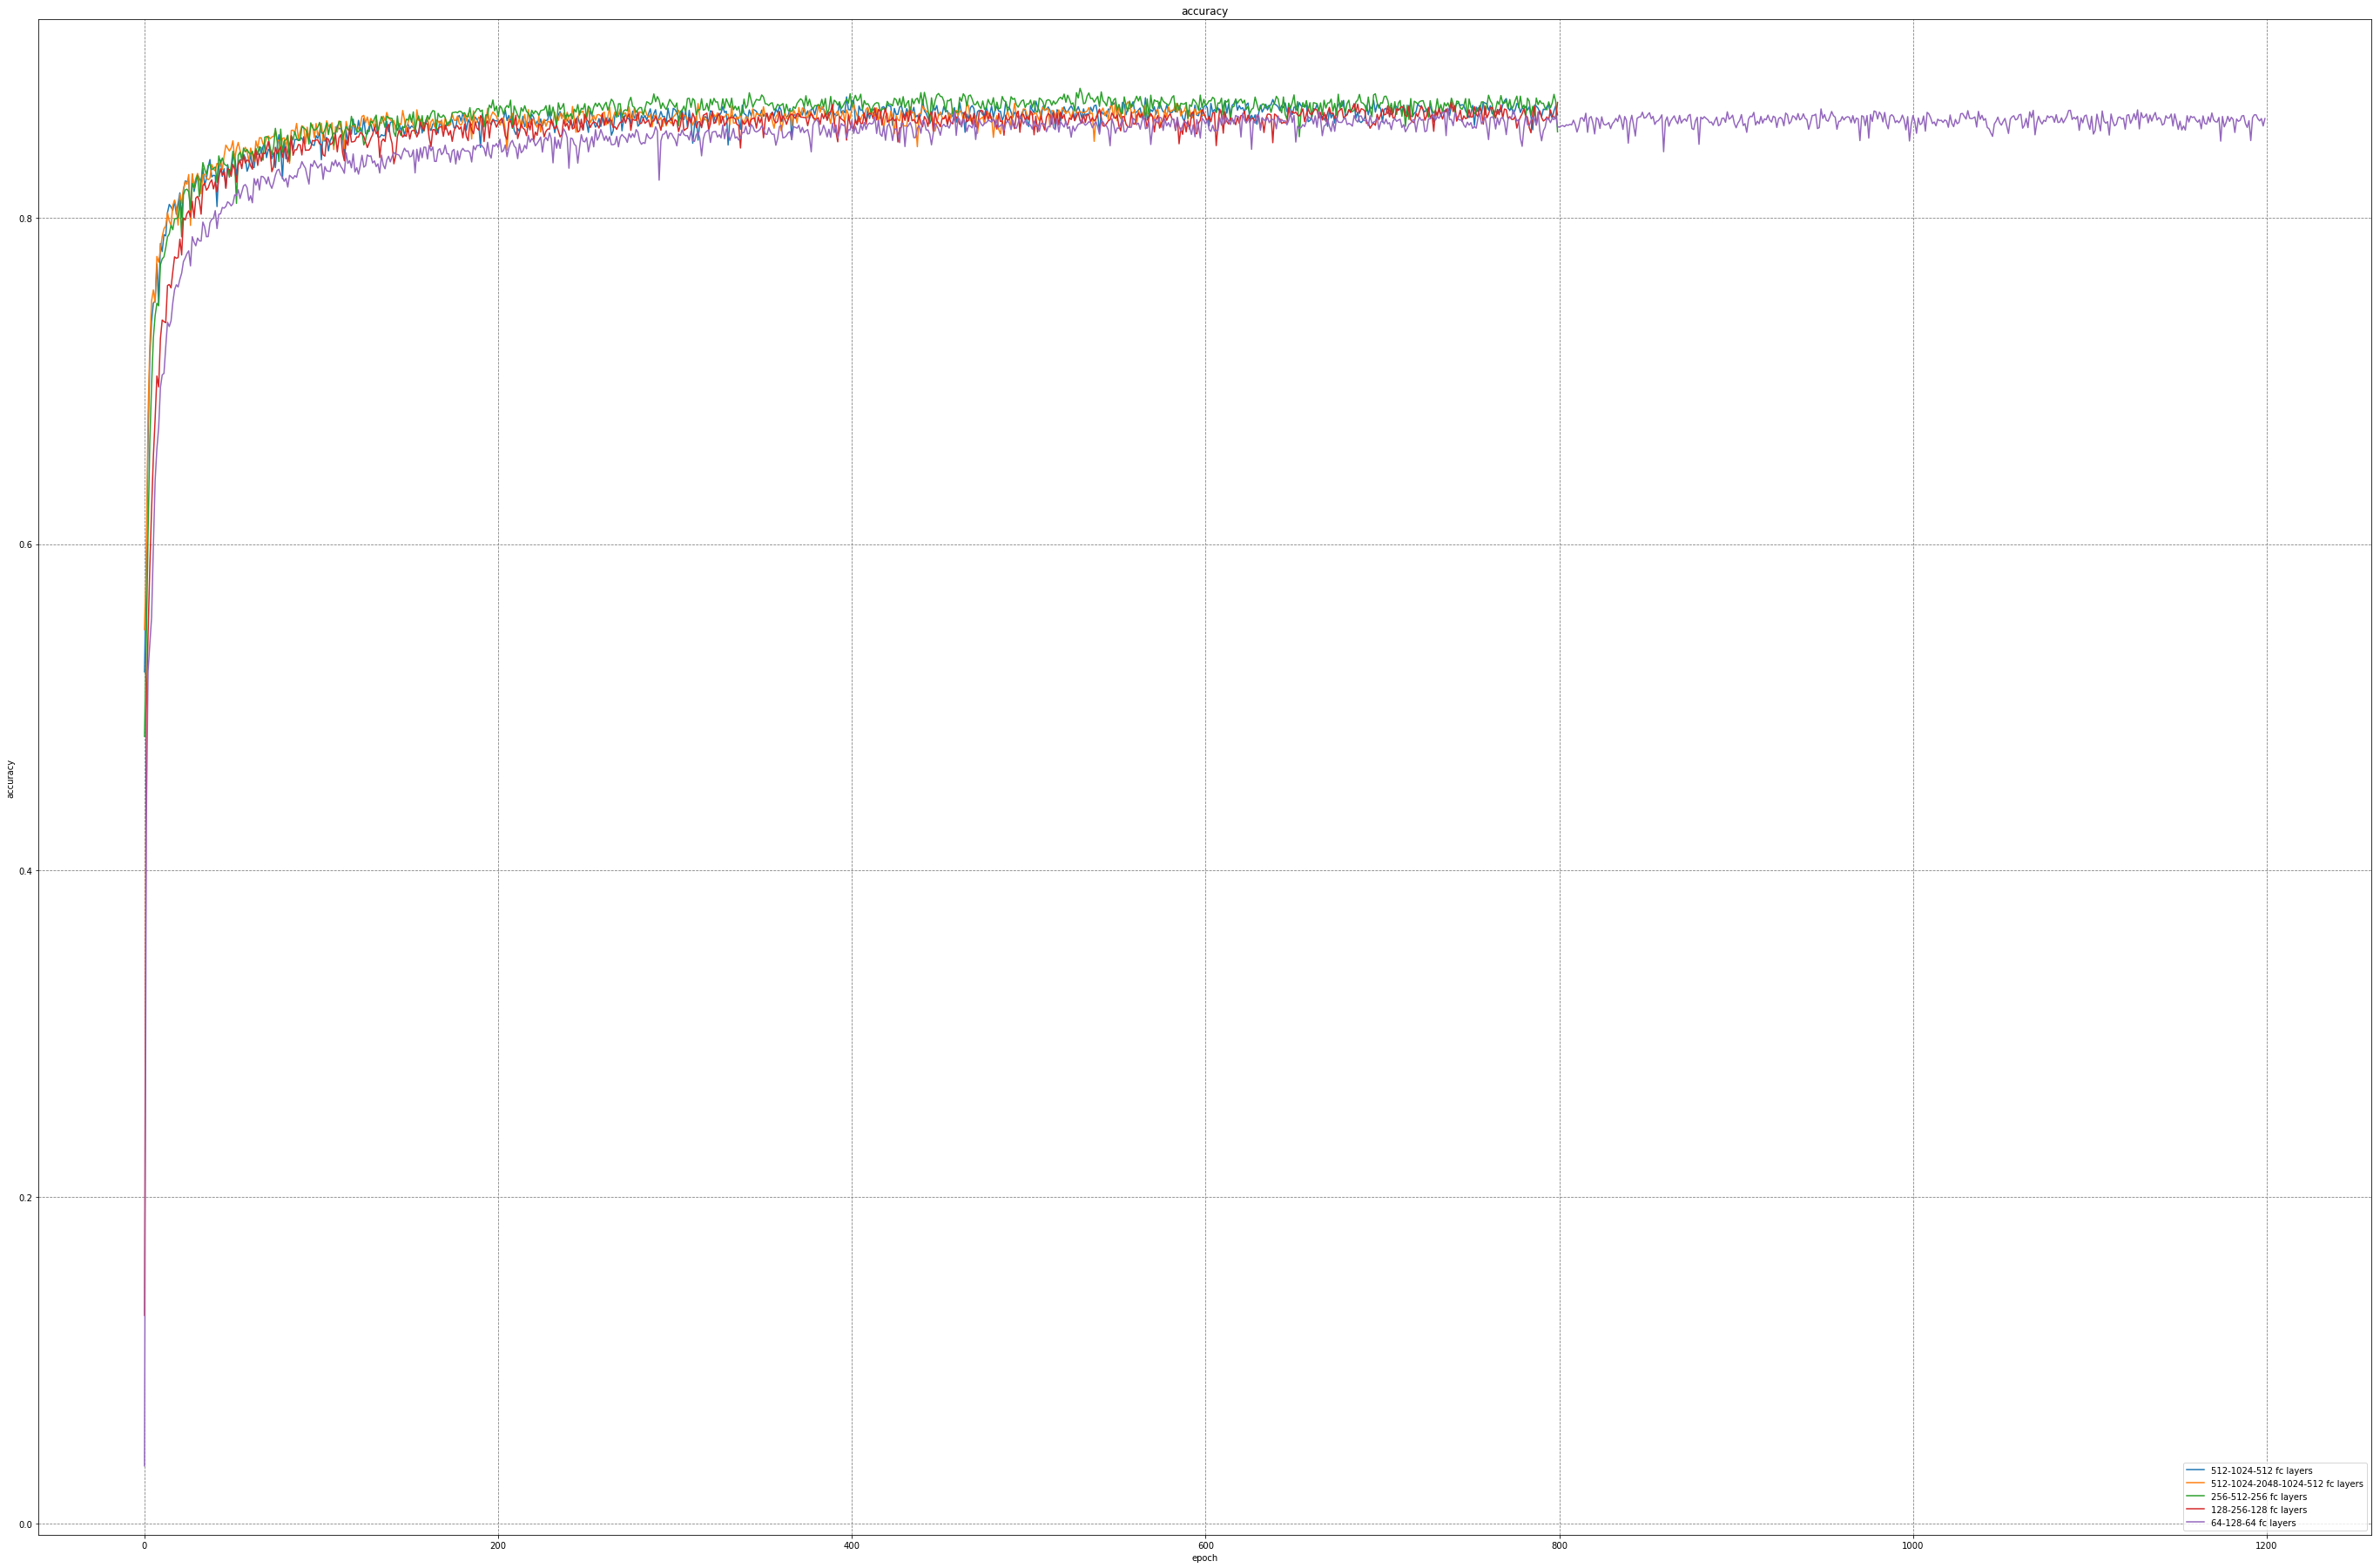

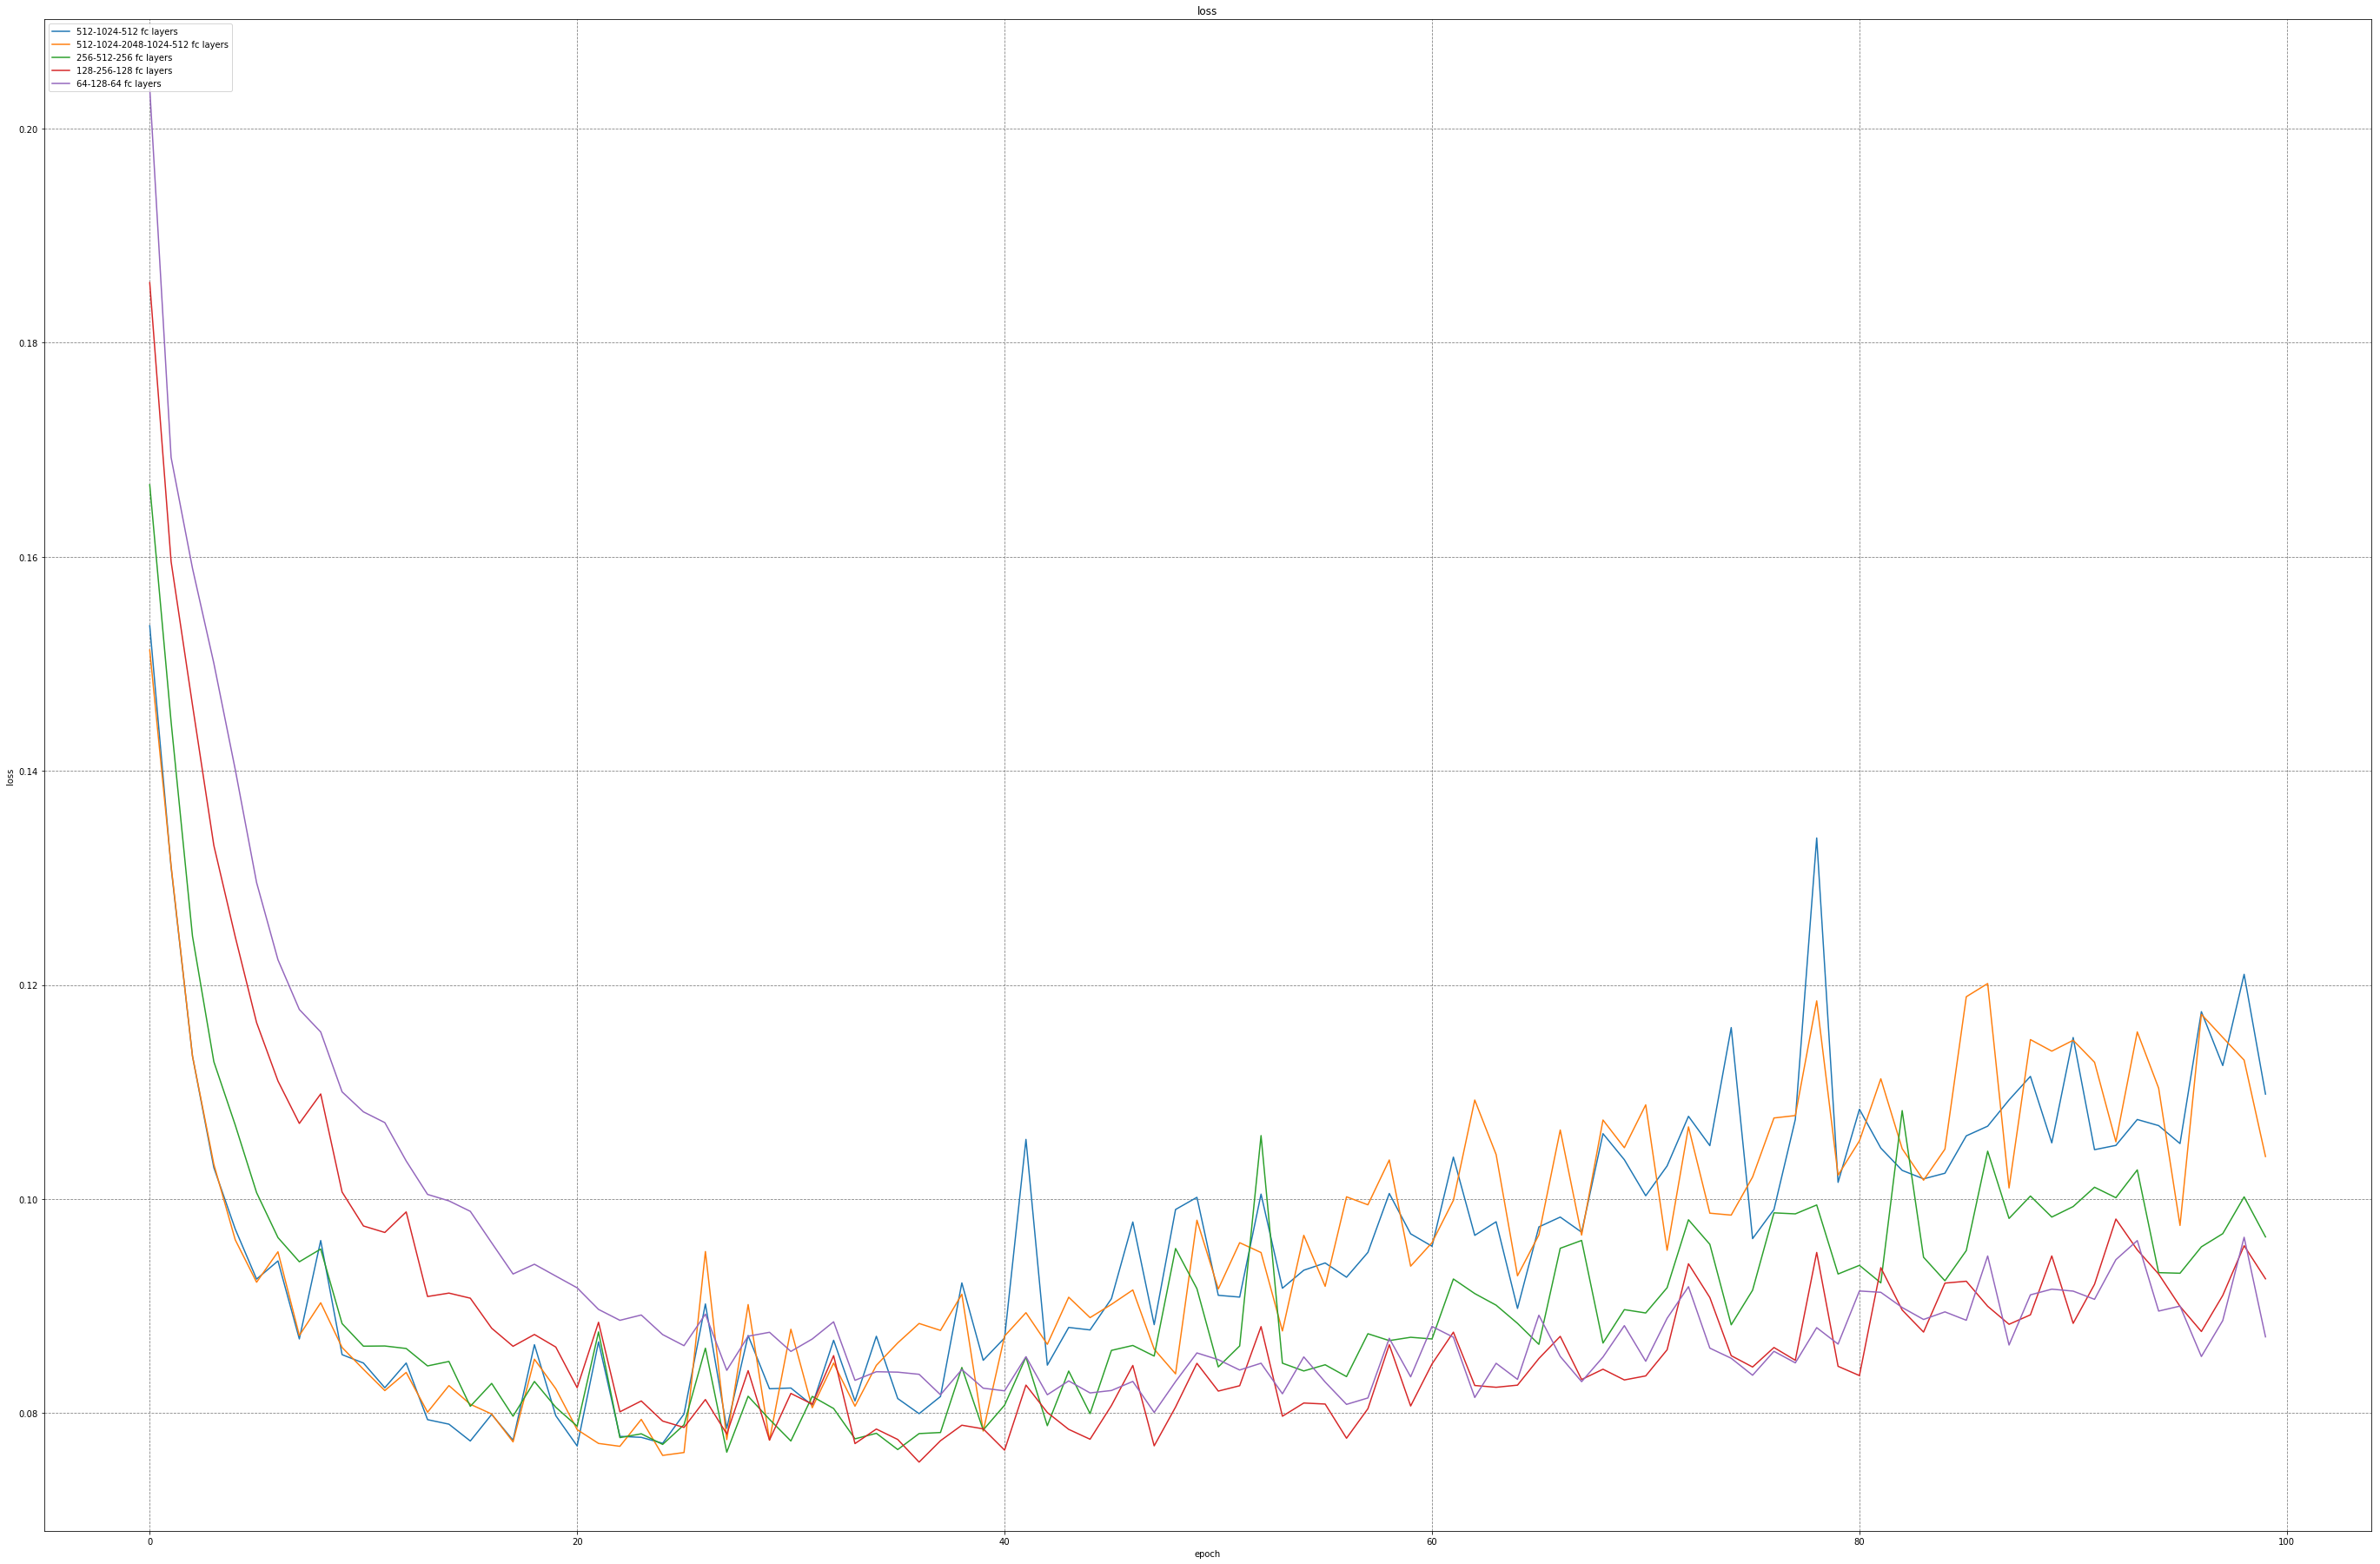

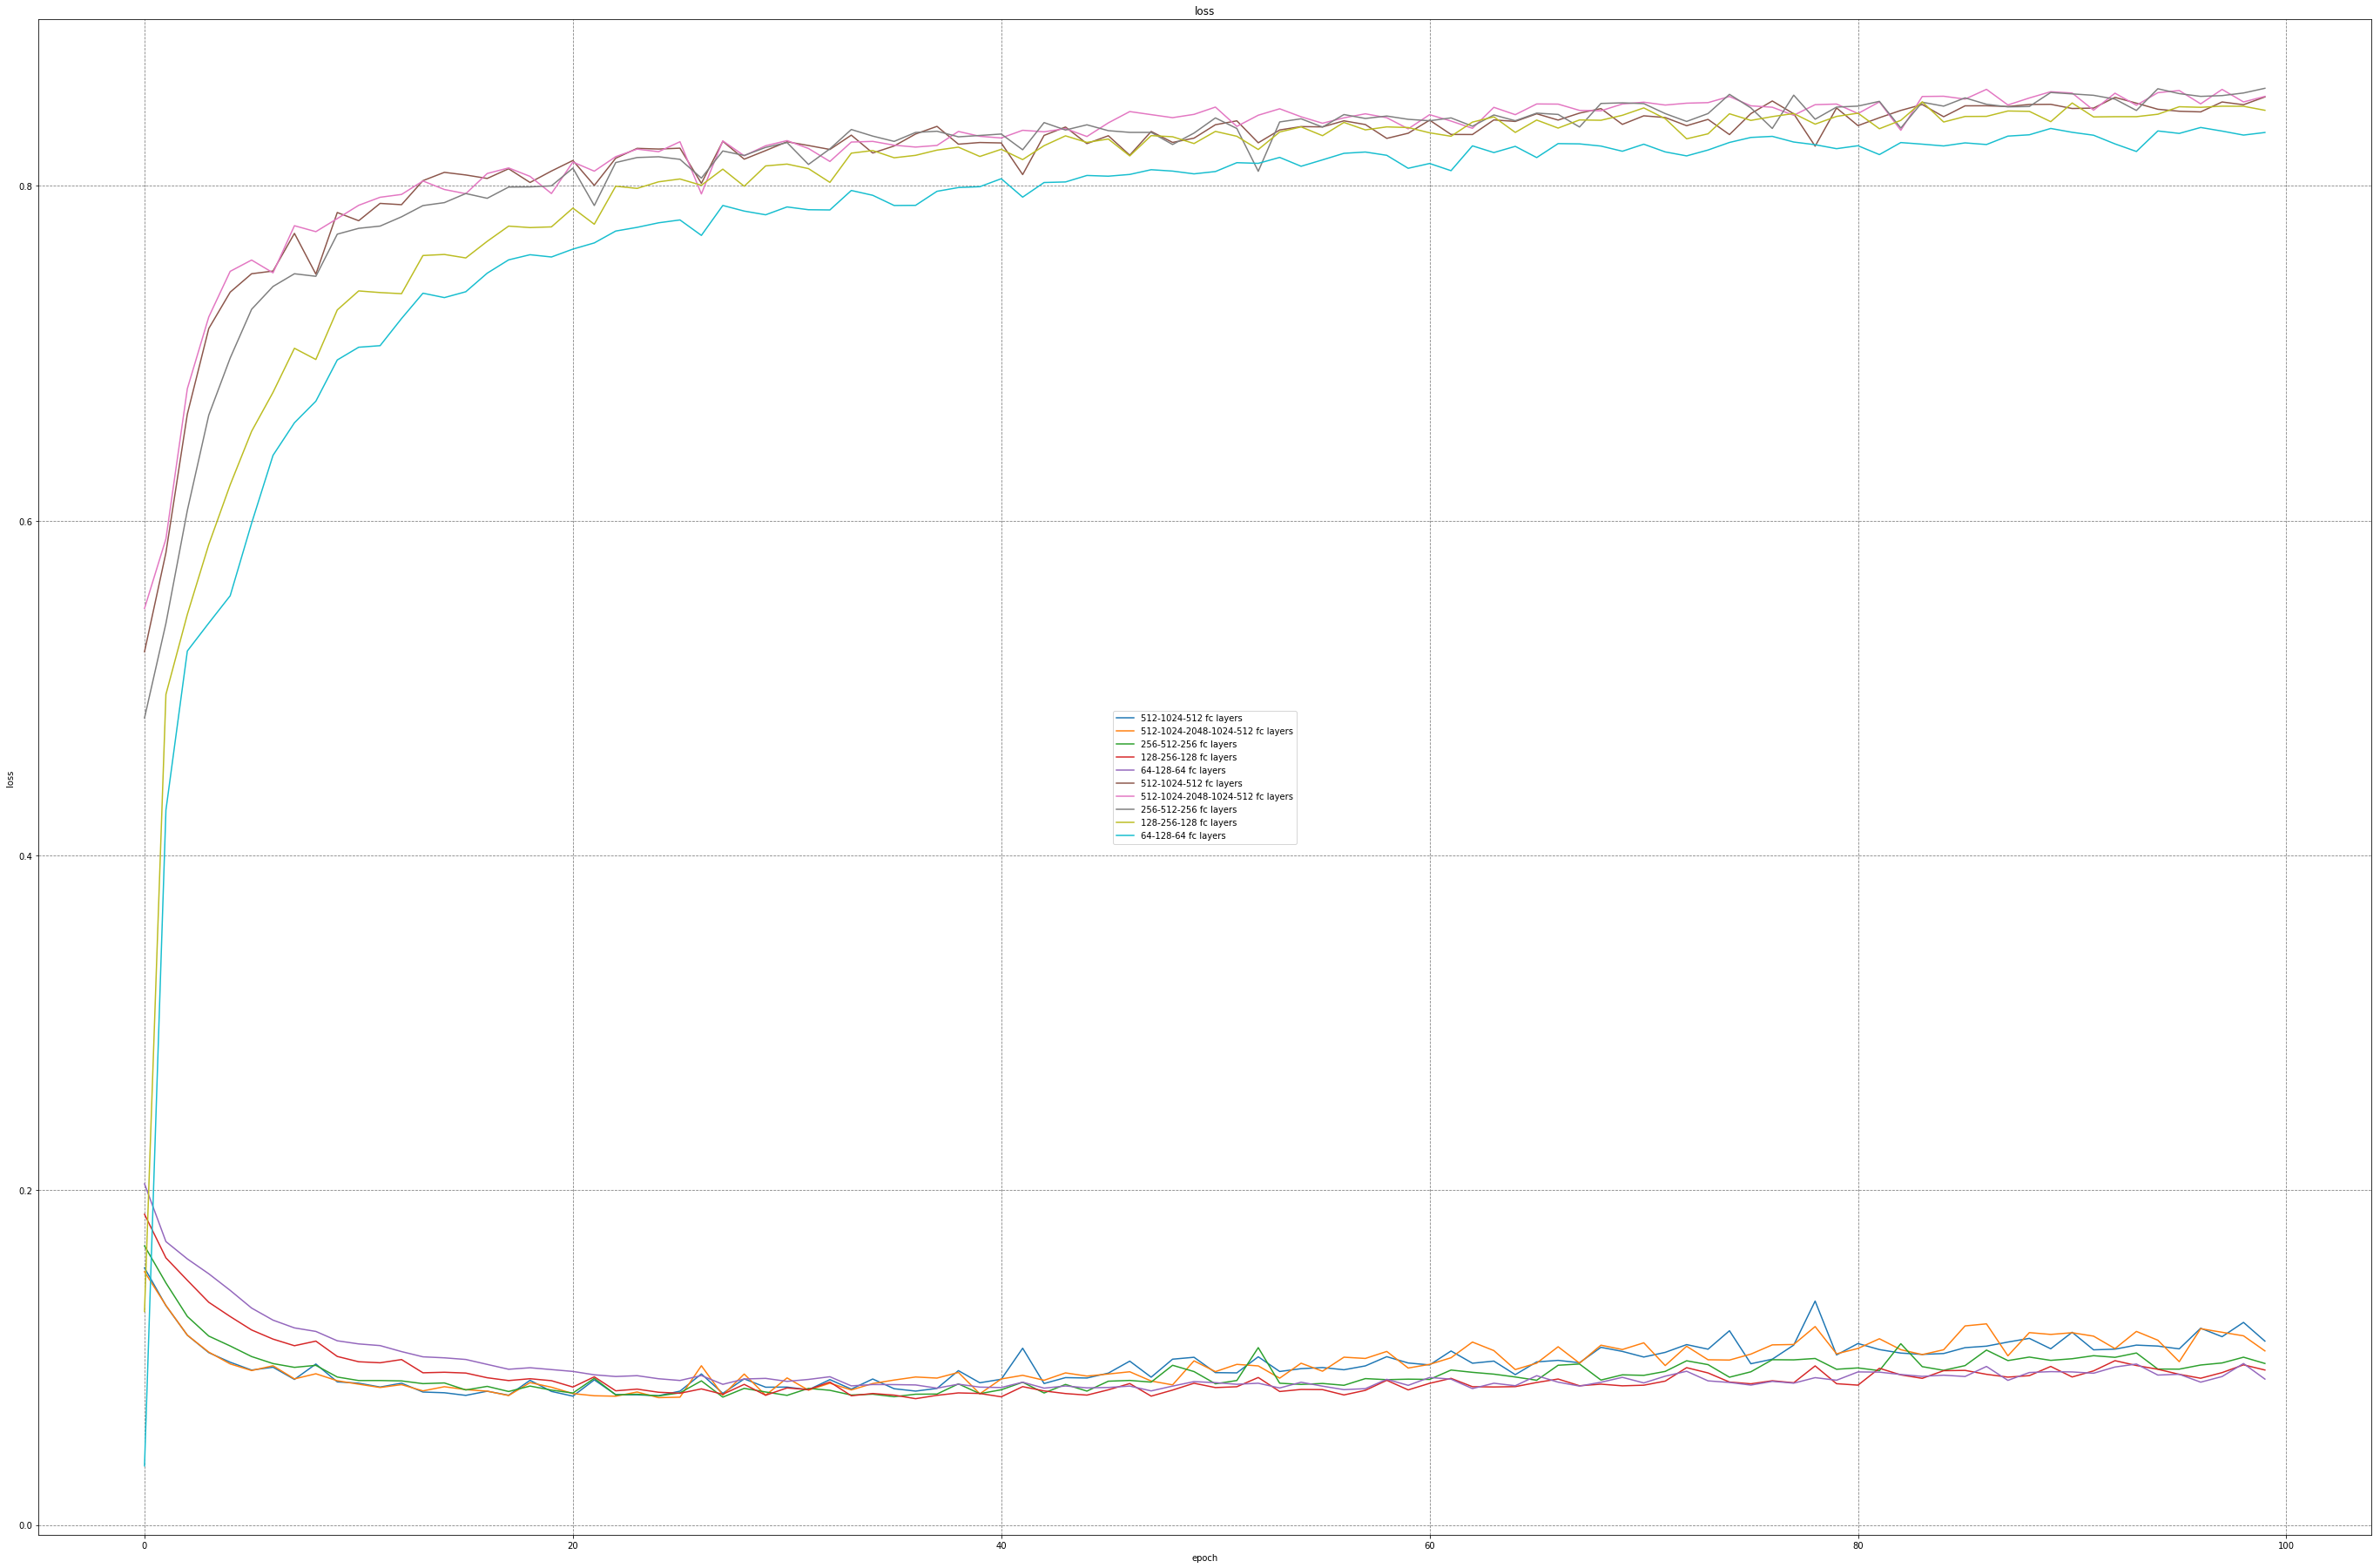

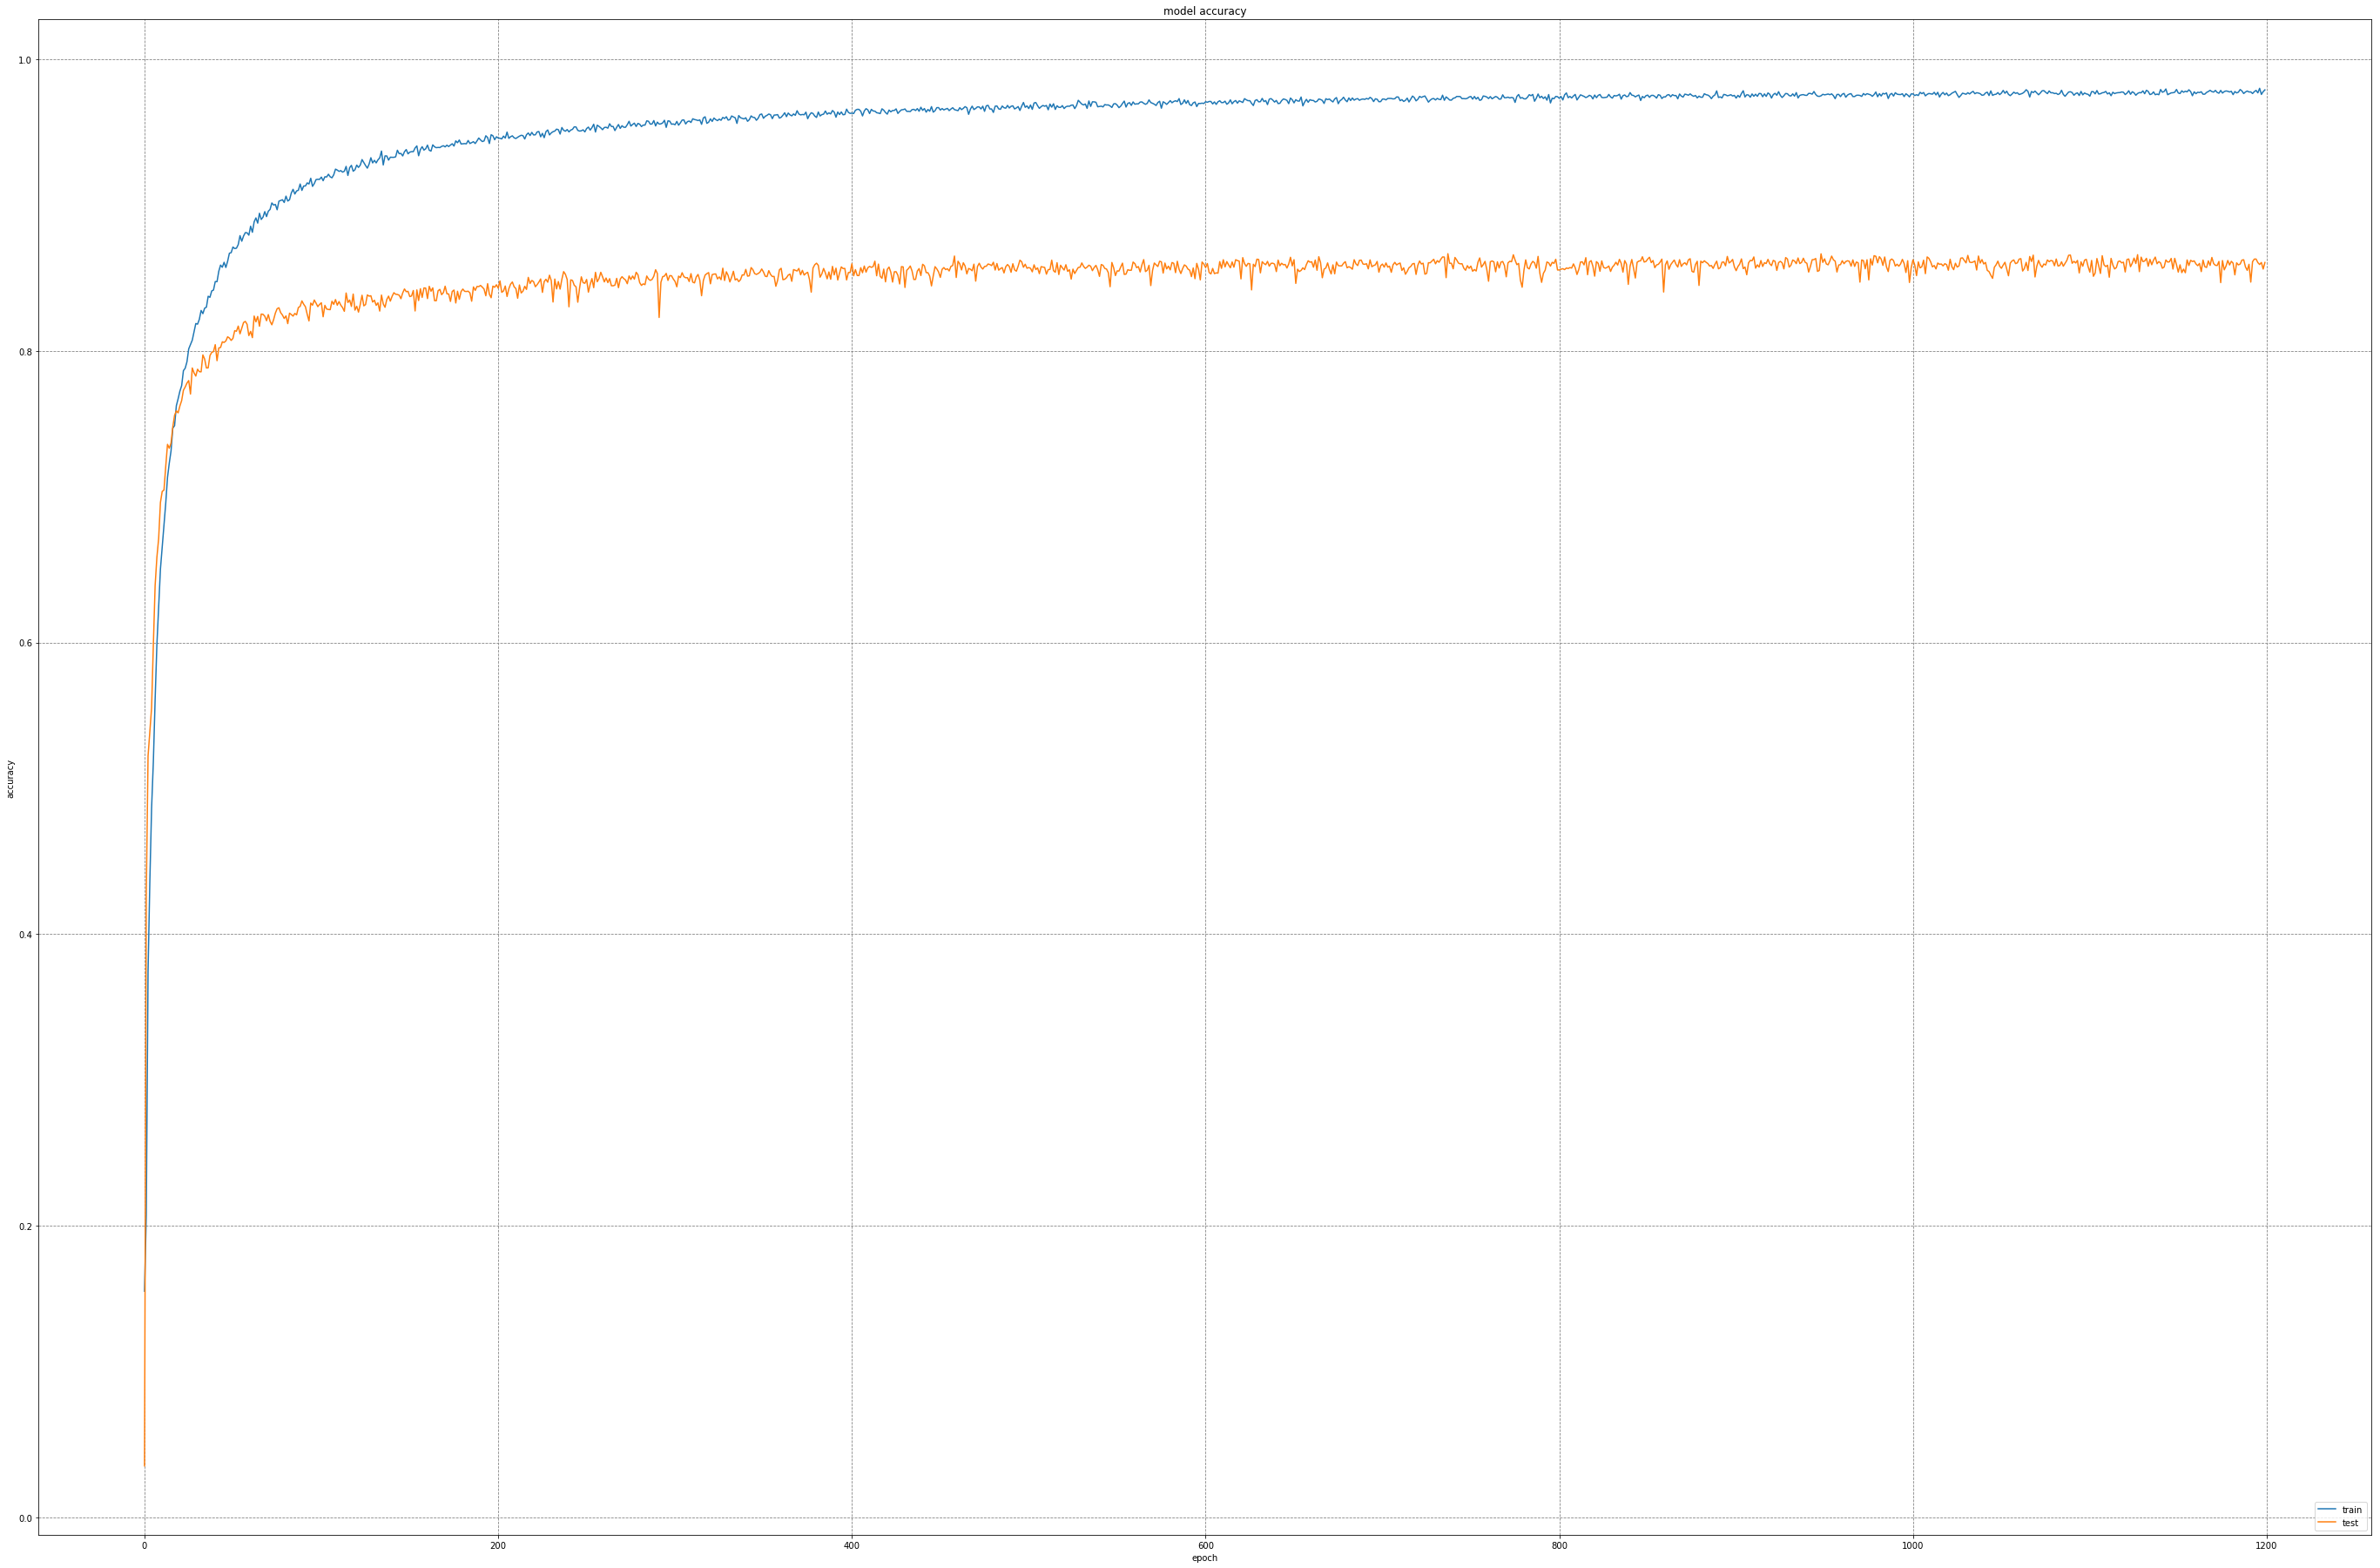

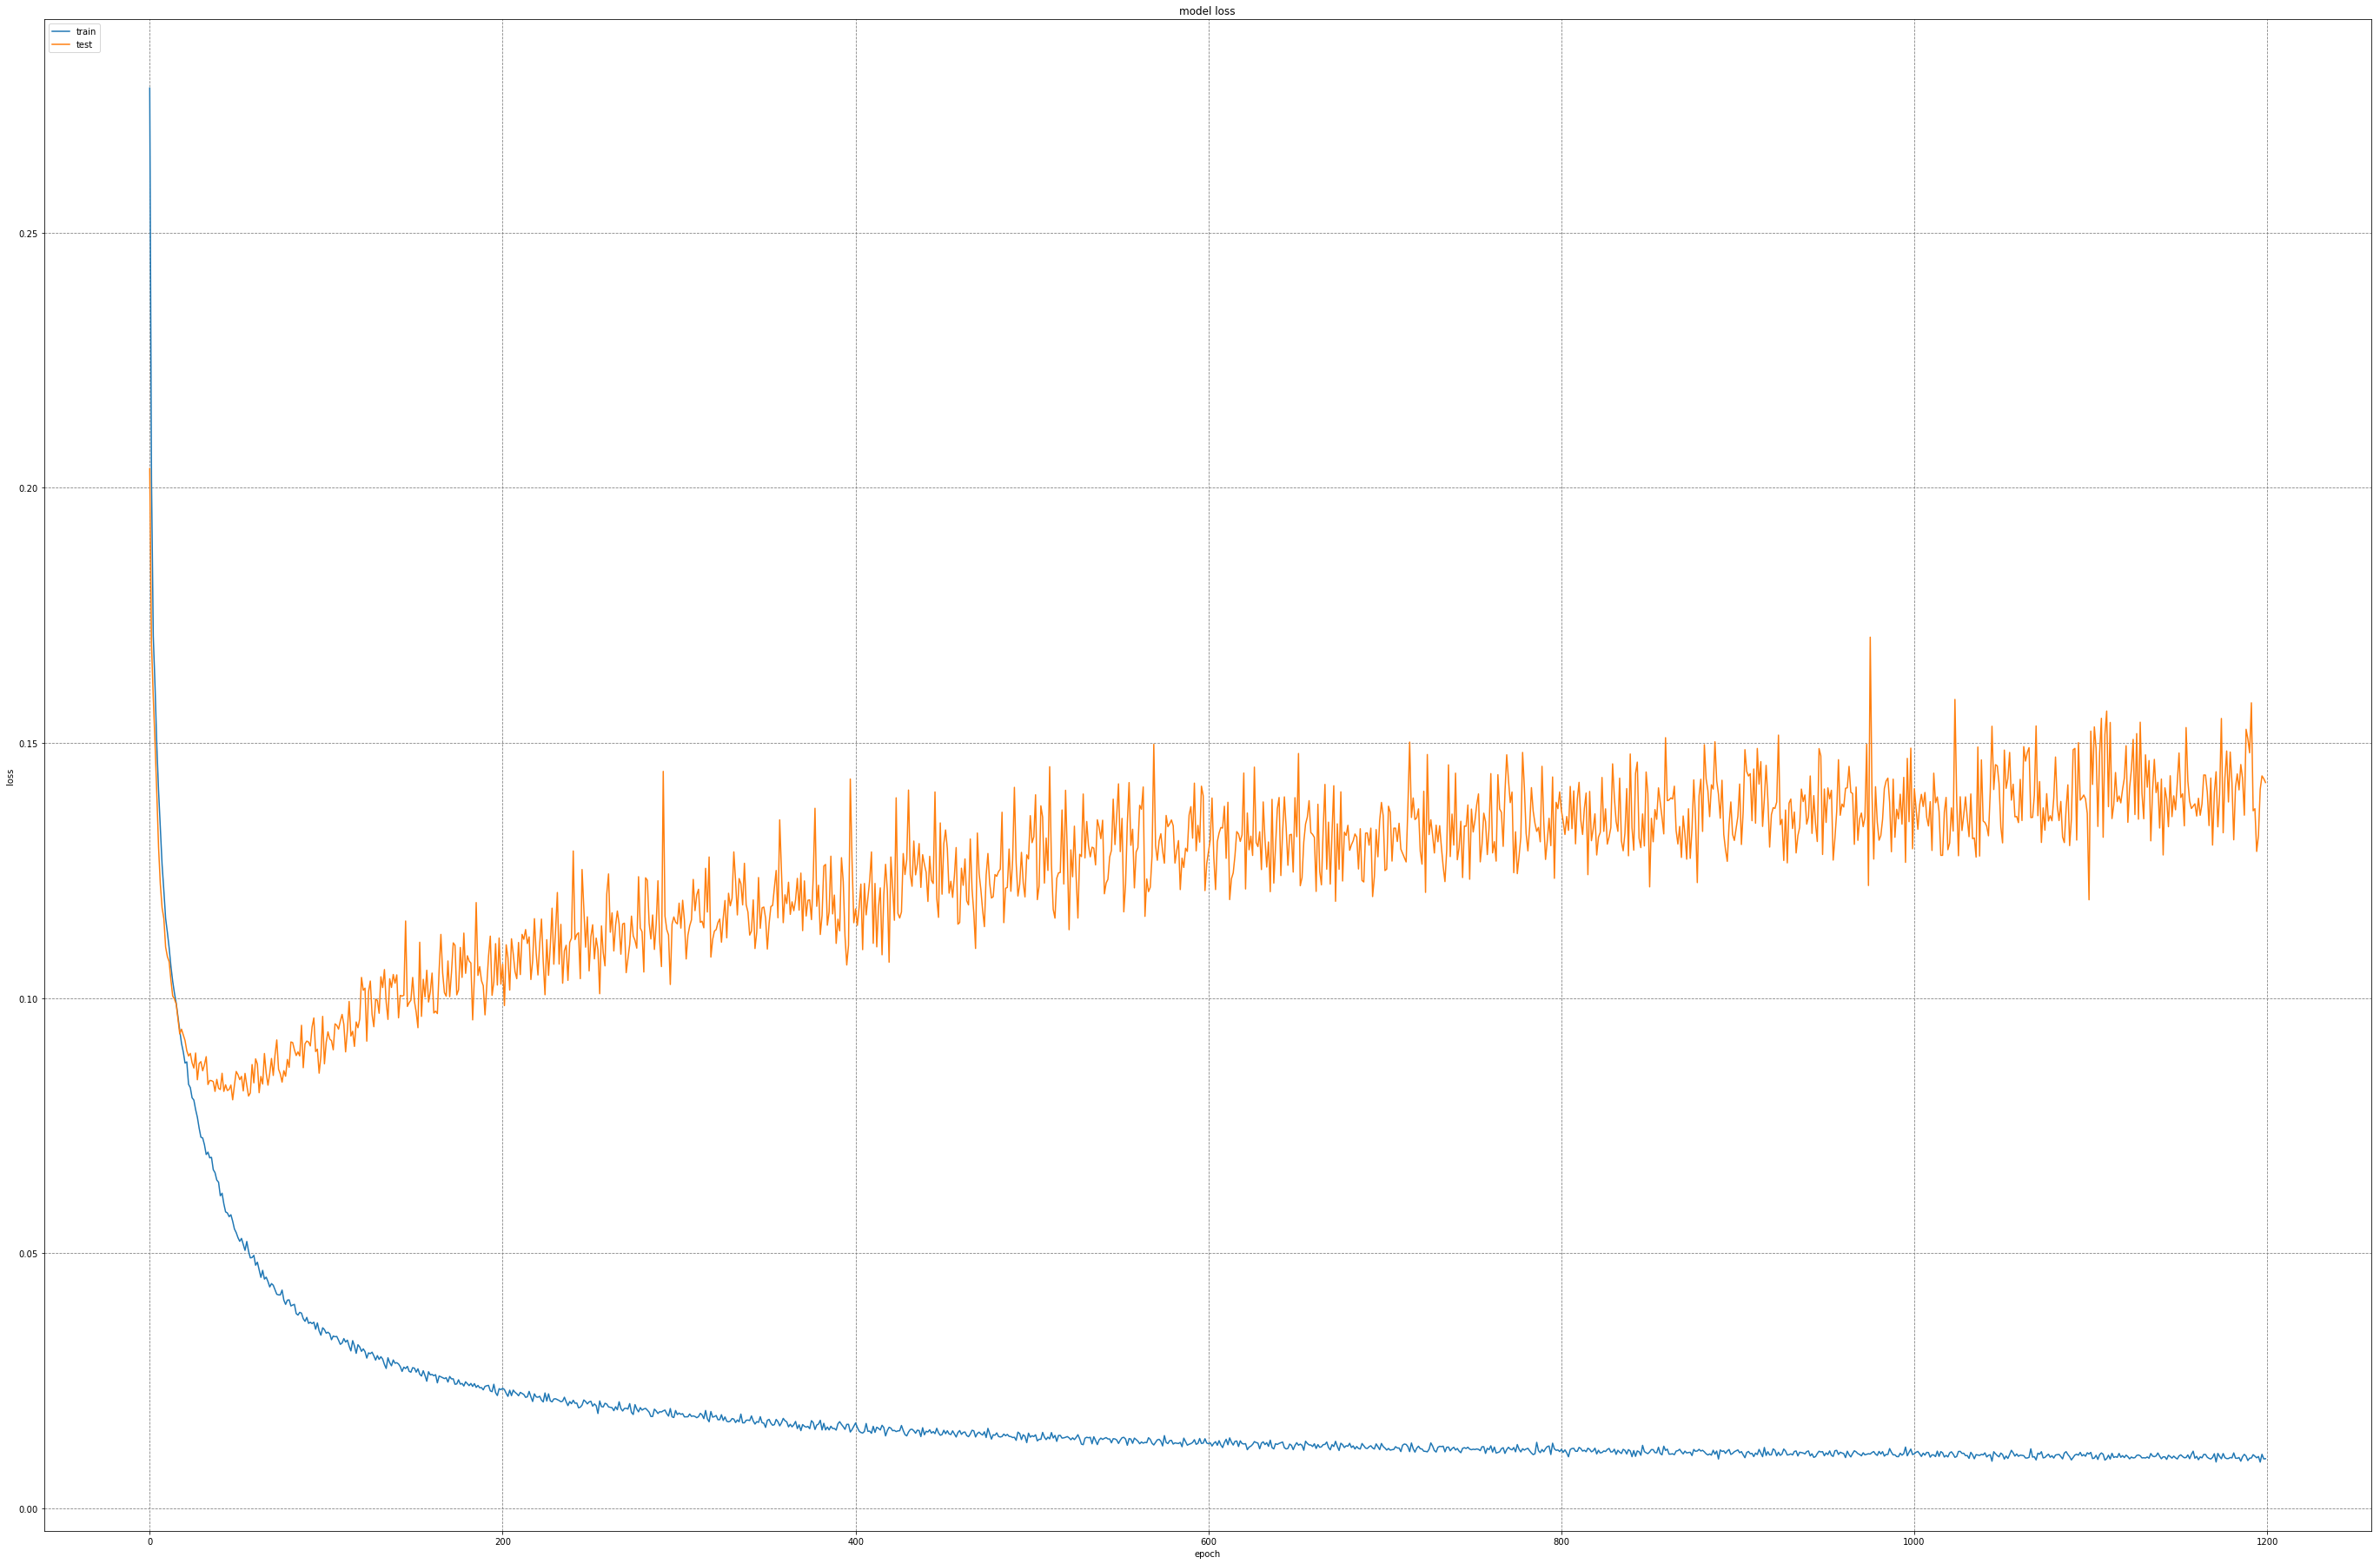

In [7]:
# plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"] = [48.0, 32.0]
# plt.rcParams["figure.figsize"] = [24.0, 16.0]
# plt.rcParams["figure.figsize"] = [12.0, 8.0]
# plt.rcParams["figure.figsize"] = [9.0, 6.0]
# plt.rcParams["figure.figsize"] = [6.0, 4.0]
for res in history:
    plt.plot(res['history']['val_actual_accuracy'][:])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='lower right')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
# # major ticks every 20, minor ticks every 5                                      
# major_ticks = np.arange(0, 101, 20)                                              
# minor_ticks = np.arange(0, 101, 5)                                               

# ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
# ax.set_yticks(major_ticks)                                                       
# ax.set_yticks(minor_ticks, minor=True)                                           

# # and a corresponding grid                                                       

# ax.grid(which='minor', alpha=0.2)                                                
# ax.grid(which='major', alpha=0.5)


# fig_size = plt.rcParams["figure.figsize"]


plt.show()

# summarize history for loss
for res in history:
    plt.plot(res['history']['val_loss'][:100])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='upper left')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

# summarize history for loss and accuracy
for res in history:
    plt.plot(res['history']['val_loss'][:100])
for res in history:
    plt.plot(res['history']['val_actual_accuracy'][:100])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='center')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()


# graphs only per model
plt.plot(res['history']['actual_accuracy'])
plt.plot(res['history']['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
# summarize history for loss
plt.plot(res['history']['loss'])
plt.plot(res['history']['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [17]:
import sys
sys.path.insert(0, '../../../')
from prepare_data import *
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
old_feature_dictionary = create_feature_dictionary(content)

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [28]:
%run ../../../prepare_data.py
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
print(len(dictionary))
print(dictionary)

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
30
['', '-', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'č', 'š', 'ž']
